# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


Bad key "text.kerning_factor" on line 4 in
/Users/mat.arruda/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 638


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&units={units}&q='
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country
        # and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | airai
Processing Record 2 of Set 1 | sitka
Processing Record 3 of Set 1 | amderma
City not found. Skipping...
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | alotau
City not found. Skipping...
Processing Record 6 of Set 1 | bojaya
City not found. Skipping...
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | port blair
Processing Record 10 of Set 1 | chokurdakh
Processing Record 11 of Set 1 | ondo
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | matagami
Processing Record 16 of Set 1 | kununurra
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | te anau
Processing Record 19 of Set 1 | eslov
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 1 | chenghai
Pr

Processing Record 36 of Set 4 | altamont
Processing Record 37 of Set 4 | lubao
Processing Record 38 of Set 4 | semey
Processing Record 39 of Set 4 | varhaug
Processing Record 40 of Set 4 | maldonado
Processing Record 41 of Set 4 | vao
Processing Record 42 of Set 4 | juneau
Processing Record 43 of Set 4 | iquique
Processing Record 44 of Set 4 | hithadhoo
Processing Record 45 of Set 4 | kolokani
Processing Record 46 of Set 4 | biak
Processing Record 47 of Set 4 | husavik
Processing Record 48 of Set 4 | aguas buenas
Processing Record 49 of Set 4 | torbay
Processing Record 0 of Set 5 | am timan
Processing Record 1 of Set 5 | nizhniy odes
Processing Record 2 of Set 5 | atasu
Processing Record 3 of Set 5 | taubate
Processing Record 4 of Set 5 | vila velha
Processing Record 5 of Set 5 | preobrazheniye
Processing Record 6 of Set 5 | talnakh
Processing Record 7 of Set 5 | springbok
Processing Record 8 of Set 5 | boa vista
Processing Record 9 of Set 5 | simao
Processing Record 10 of Set 5 | krui

Processing Record 28 of Set 8 | warmbad
Processing Record 29 of Set 8 | dikson
Processing Record 30 of Set 8 | pochutla
Processing Record 31 of Set 8 | zatoka
Processing Record 32 of Set 8 | manitouwadge
Processing Record 33 of Set 8 | jiaocheng
Processing Record 34 of Set 8 | alexander city
Processing Record 35 of Set 8 | half moon bay
Processing Record 36 of Set 8 | coahuayana
Processing Record 37 of Set 8 | zhitikara
City not found. Skipping...
Processing Record 38 of Set 8 | ulundi
Processing Record 39 of Set 8 | malinyi
Processing Record 40 of Set 8 | santa fe
Processing Record 41 of Set 8 | strathmore
Processing Record 42 of Set 8 | samarai
Processing Record 43 of Set 8 | santa rosa
Processing Record 44 of Set 8 | tual
Processing Record 45 of Set 8 | chalus
Processing Record 46 of Set 8 | dali
Processing Record 47 of Set 8 | lasa
Processing Record 48 of Set 8 | mayo
Processing Record 49 of Set 8 | castro
Processing Record 0 of Set 9 | qasigiannguit
Processing Record 1 of Set 9 | 

Processing Record 17 of Set 12 | vikulovo
Processing Record 18 of Set 12 | santa maria
Processing Record 19 of Set 12 | kuminskiy
Processing Record 20 of Set 12 | new cumnock
Processing Record 21 of Set 12 | dolbeau
City not found. Skipping...
Processing Record 22 of Set 12 | eyl
Processing Record 23 of Set 12 | umm jarr
City not found. Skipping...
Processing Record 24 of Set 12 | altus
Processing Record 25 of Set 12 | cap-haitien
Processing Record 26 of Set 12 | ballitoville
Processing Record 27 of Set 12 | la primavera
Processing Record 28 of Set 12 | oeiras do para
Processing Record 29 of Set 12 | sharjah
Processing Record 30 of Set 12 | mitsamiouli
Processing Record 31 of Set 12 | san quintin
Processing Record 32 of Set 12 | palana
Processing Record 33 of Set 12 | grindavik
Processing Record 34 of Set 12 | inhambane
Processing Record 35 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 36 of Set 12 | kholmy
Processing Record 37 of Set 12 | kharp
Processin

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,airai,-8.9266,125.4092,21.16,82,82,1.29,TL,1675227191
1,sitka,57.0531,-135.3300,3.94,87,100,2.06,US,1675227192
2,arraial do cabo,-22.9661,-42.0278,24.13,90,91,10.59,BR,1675227032
3,georgetown,5.4112,100.3354,29.97,70,20,2.06,MY,1675227102
4,iqaluit,63.7506,-68.5145,-26.15,76,75,8.75,CA,1675227194


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,airai,-8.9266,125.4092,21.16,82,82,1.29,TL,1675227191
1,sitka,57.0531,-135.3300,3.94,87,100,2.06,US,1675227192
2,arraial do cabo,-22.9661,-42.0278,24.13,90,91,10.59,BR,1675227032
3,georgetown,5.4112,100.3354,29.97,70,20,2.06,MY,1675227102
4,iqaluit,63.7506,-68.5145,-26.15,76,75,8.75,CA,1675227194


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

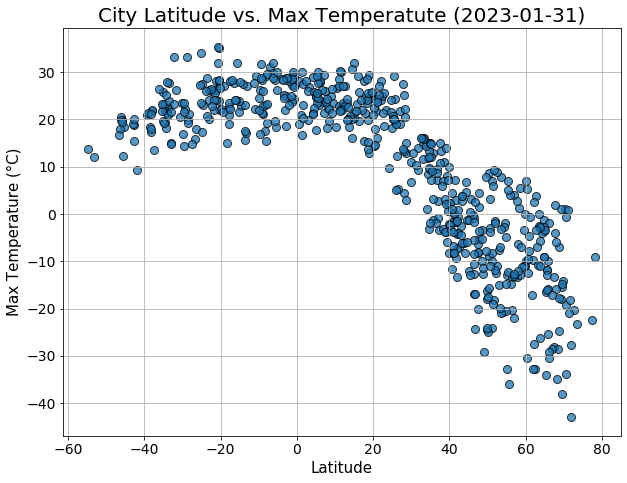

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x = 'Lat', y = 'Max Temp',marker = 'o', edgecolors = 'black',\
                          s = 65, alpha = 0.75, figsize = (10, 7.5))

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize = 15)
plt.ylabel('Max Temperature (°C)', fontsize = 15)
plt.title('City Latitude vs. Max Temperatute (2023-01-31)', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

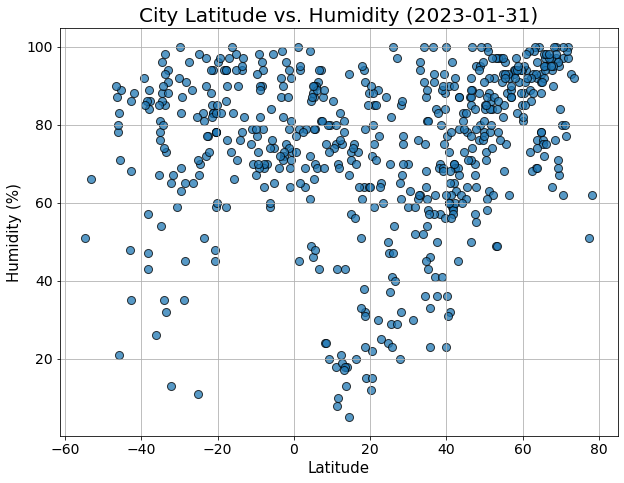

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x = 'Lat', y = 'Humidity', marker = 'o', edgecolors = 'black',\
                          s = 65, alpha = 0.75, figsize = (10, 7.5))

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize = 15)
plt.ylabel('Humidity (%)', fontsize = 15)
plt.title('City Latitude vs. Humidity (2023-01-31)', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

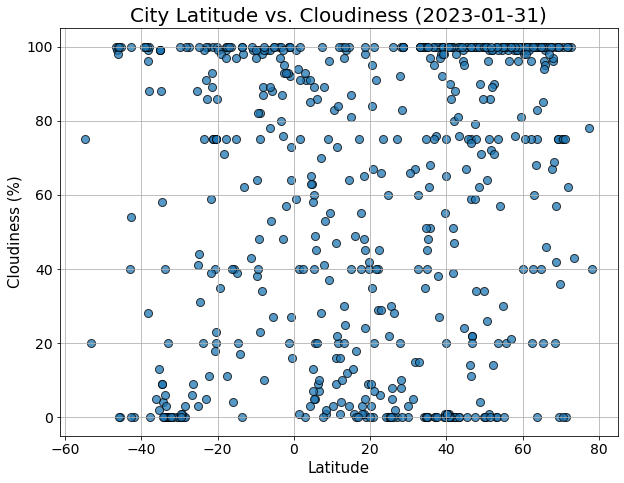

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x = 'Lat', y = 'Cloudiness', marker = 'o', edgecolors = 'black',\
                          s = 65, alpha = 0.75, figsize = (10, 7.5))

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize = 15)
plt.ylabel('Cloudiness (%)', fontsize = 15)
plt.title('City Latitude vs. Cloudiness (2023-01-31)', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

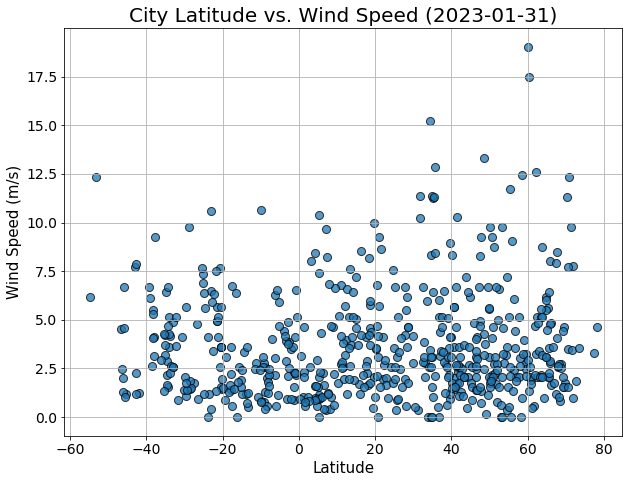

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x = 'Lat', y = 'Wind Speed', marker = 'o', edgecolors = 'black',\
                          s = 65, alpha = 0.75, figsize = (10, 7.5))

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize = 15)
plt.ylabel('Wind Speed (m/s)', fontsize = 15)
plt.title('City Latitude vs. Wind Speed (2023-01-31)', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lin_reg_plot(data, x_name, y_name):
    x = data[x_name]
    y = data[y_name]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f'The r-value is: {rvalue}.')
    
    plt.scatter(x, y, marker = 'o', edgecolors = 'black', s = 65, alpha = 0.75)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.plot(x, regress_values, 'r-')
    plt.show()
    
    print(line_eq)

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,sitka,57.0531,-135.3300,3.94,87,100,2.06,US,1675227192
3,georgetown,5.4112,100.3354,29.97,70,20,2.06,MY,1675227102
4,iqaluit,63.7506,-68.5145,-26.15,76,75,8.75,CA,1675227194
5,port blair,11.6667,92.7500,30.02,70,20,2.57,IN,1675227194
6,chokurdakh,70.6333,147.9167,-19.27,97,100,3.50,RU,1675227194


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,airai,-8.9266,125.4092,21.16,82,82,1.29,TL,1675227191
2,arraial do cabo,-22.9661,-42.0278,24.13,90,91,10.59,BR,1675227032
8,punta arenas,-53.1500,-70.9167,12.06,66,20,12.35,CL,1675227195
9,bredasdorp,-34.5322,20.0403,19.46,88,9,2.17,ZA,1675227196
10,puerto ayora,-0.7393,-90.3518,24.19,92,73,2.18,EC,1675227196


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8613108311732227.


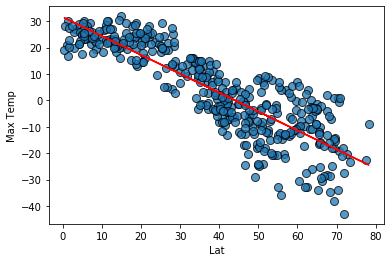

y = -0.72x + 31.52


In [15]:
# Linear regression on Northern Hemisphere
lin_reg_plot(northern_hemi_df, 'Lat', 'Max Temp')

The r-value is: 0.4828972786897164.


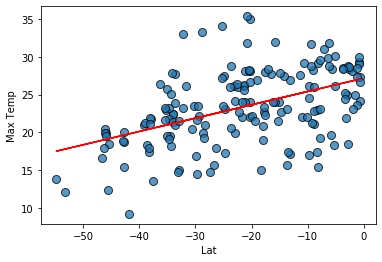

y = 0.18x + 27.18


In [16]:
# Linear regression on Southern Hemisphere
lin_reg_plot(southern_hemi_df, 'Lat', 'Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4040164957437467.


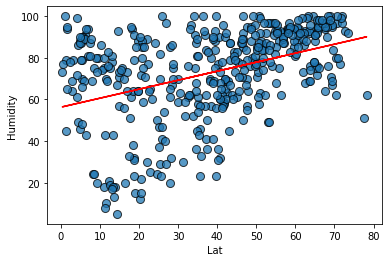

y = 0.43x + 56.28


In [17]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df, 'Lat', 'Humidity')

The r-value is: 0.1977559378566313.


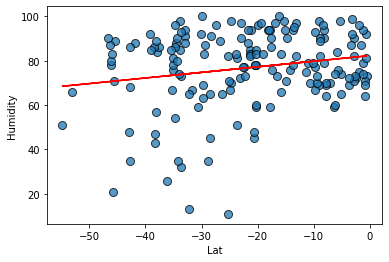

y = 0.25x + 82.3


In [18]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df, 'Lat', 'Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.34185874972140473.


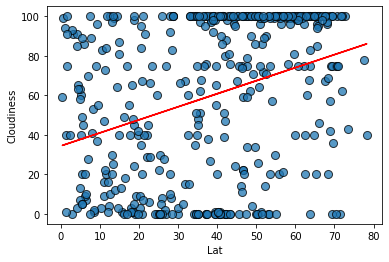

y = 0.66x + 34.38


In [19]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df, 'Lat', 'Cloudiness')

The r-value is: 0.28867796552411706.


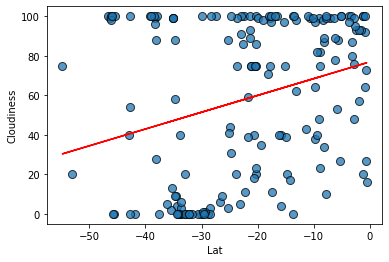

y = 0.85x + 76.97


In [20]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df, 'Lat', 'Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.08532241778703688.


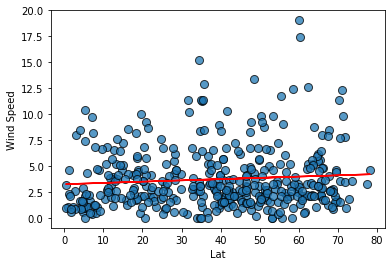

y = 0.01x + 3.23


In [21]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df, 'Lat', 'Wind Speed')

The r-value is: -0.2291835278765031.


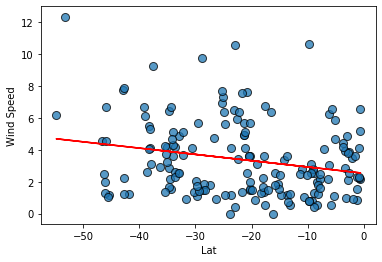

y = -0.04x + 2.53


In [22]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df, 'Lat', 'Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE